In [14]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
train_path = r'C:\Users\HP\Desktop\MS\CV\assignment\Objects_Dataset_Images-20230311T141531Z-001\Objects_Dataset_Images\train'
test_path = r'C:\Users\HP\Desktop\MS\CV\assignment\Objects_Dataset_Images-20230311T141531Z-001\Objects_Dataset_Images\test'
train = []
test = []
classes = []
train_labels = []
test_labels = []
for i in os.listdir(train_path):
    path1 = os.path.join(train_path, i)
    classes.append(i)
    for j in os.listdir(path1):
        train_labels.append(len(classes))
        img = cv2.imread(os.path.join(path1,j))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        sift = cv2.SIFT_create()
        keypoints,descriptors = sift.detectAndCompute(img,None)
        train.append(descriptors)
    print(descriptors.shape)
    print(f'Loaded {i} images')
classes = []
for i in os.listdir(test_path):
    path1 = os.path.join(test_path, i)
    classes.append(i)
    for j in os.listdir(path1):
        test_labels.append(len(classes))
        img = cv2.imread(os.path.join(path1,j))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        sift = cv2.SIFT_create()
        keypoints,descriptors = sift.detectAndCompute(img,None)
        test.append(descriptors)
    print(descriptors.shape)
    print(f'Loaded {i} images')

(788, 128)
Loaded accordion images
(518, 128)
Loaded dollar_bill images
(170, 128)
Loaded motorbike images
(237, 128)
Loaded Soccer_Ball images
(825, 128)
Loaded accordian images
(418, 128)
Loaded dollar_bill images
(203, 128)
Loaded motorbike images
(92, 128)
Loaded Soccer_Ball images


In [16]:
train_features = np.vstack(train)
test_features = np.vstack(test)

In [ ]:
cdist(train_features[0],bow_dict)

In [17]:
clusters = 60
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(train_features)
bow_dict = kmeans.cluster_centers_

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
bow_dict.shape,train_features.shape

((60, 128), (25089, 128))

In [6]:
def create_feature_bow(img_desc, BoW, clusters):

    X_features = []

    for i in range(len(img_desc)):
        features = np.array([0] * clusters)

        if img_desc[i] is not None:
            distance = cdist(img_desc[i], BoW)

            argmin = np.argmin(distance, axis = 1)

            for j in argmin:
                features[j] += 1
        X_features.append(features)

    return X_features

In [7]:
train_features = create_feature_bow(train,bow_dict,clusters)
test_features = create_feature_bow(test,bow_dict,clusters)
print(np.array(train_features).shape),print(np.array(test_features).shape)

(56, 60)
(8, 60)


(None, None)

In [8]:
train[0].shape

(824, 128)

In [37]:
svm = SVC(C=20,random_state=0)
svm.fit(train_features,train_labels)

SVC(C=20, random_state=0)

In [38]:
print("score on training set params: ", svm.score(train_features, train_labels))
print("score on testing set params: ", svm.score(test_features,test_labels))

score on training set params:  1.0
score on testing set params:  0.875


In [39]:
test_labels

[1, 1, 2, 2, 3, 3, 4, 4]

In [44]:
import matplotlib.pyplot as plt

-----------------------------------------------------------------


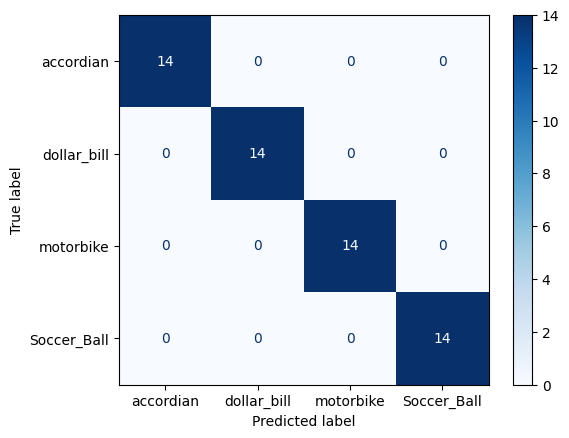

In [48]:
tr_predictions = svm.predict(train_features)
print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(train_labels,tr_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=classes)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

-----------------------------------------------------------------


<AxesSubplot: >

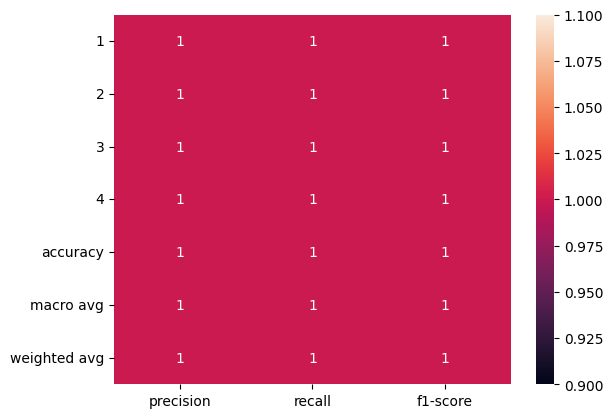

In [51]:
# Classification report
print("-----------------------------------------------------------------")
clf_report = classification_report(train_labels, tr_predictions,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

-----------------------------------------------------------------


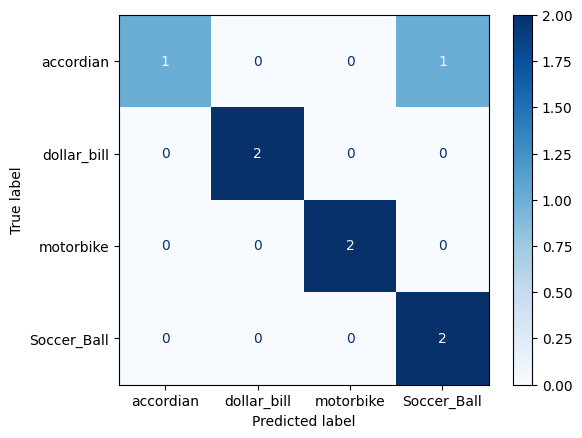

In [52]:
te_predictions = svm.predict(test_features)
print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_labels,te_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=classes)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

-----------------------------------------------------------------


<AxesSubplot: >

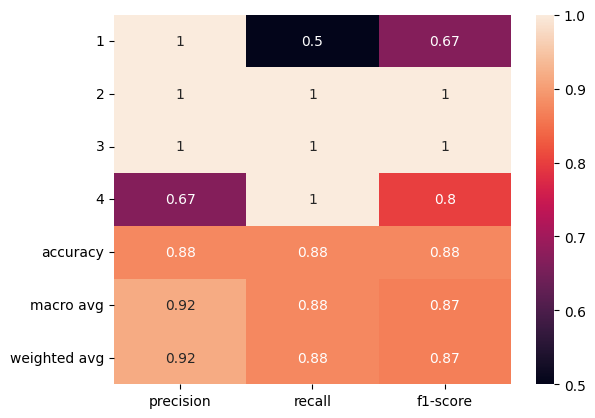

In [53]:
# Classification report
print("-----------------------------------------------------------------")
clf_report = classification_report(test_labels, te_predictions,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)